In [1]:
import random
import numpy as np
from data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [4]:
root = 'E:\jupyter\CS231n\Assignment1\data\cifar-10-batches-py'
X_train,Y_train,X_test,Y_test = load_CIFAR10(root)

num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500
#create a small development set as a subset of the training data;
# we can use this for development so our code runs faster.

mask = range(num_training,num_training + num_validation)
X_val = X_train[mask]
Y_val = Y_train[mask]

mask = range(num_training)
X_train = X_train[mask]
Y_train = Y_train[mask]
#print(mask)
mask = range(num_test)
X_test = X_test[mask]
Y_test = Y_test[mask]

mask = np.random.choice(num_training,num_dev,replace = False)
X_dev = X_train[mask]
Y_dev = Y_train[mask]

X_train = X_train.reshape(num_training,-1)
X_test = X_test.reshape(num_test,-1)
X_val = X_val.reshape(num_validation,-1)
X_dev = X_dev.reshape(num_dev,-1)

# Normalize the data: subtract the mean image
mean_image = np.mean(X_train,axis = 0)
X_train -= mean_image
X_test -= mean_image
X_val -= mean_image
X_dev -= mean_image

#add bias
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])#hstack水平存储
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])

print ('Train data shape: ', X_train.shape)
print ('Train labels shape: ', Y_train.shape)
print ('Validation data shape: ', X_val.shape)
print ('Validation labels shape: ', Y_val.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', Y_test.shape)
print ('Dev data shape: ', X_dev.shape)
print ('Dev labels shape: ', Y_dev.shape)

Train data shape:  (49000, 3073)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3073)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3073)
Test labels shape:  (1000,)
Dev data shape:  (500, 3073)
Dev labels shape:  (500,)


In [8]:
from classifiers.softmax import softmax_loss_naive
from classifiers.softmax import softmax_loss_vectorized
import time

W = np.random.randn(3073,10) * 0.0001
start = time.time()
loss , grad = softmax_loss_naive(W,X_dev,Y_dev,0)
end = time.time()
print('spend time:',end-start)
print('loss:',loss)

start = time.time()
loss , grad = softmax_loss_vectorized(W,X_dev,Y_dev,0)
end = time.time()
print('spend time:',end-start)
print('loss:',loss)

# 如果使用Softmax分类器，
# 我们预测应该可以拿到值为2.302左右的初始loss(因为10个类别，初始概率应该都未0.1，Softmax损失是-log(正确类别的概率):-ln(0.1)=2.302)

spend time: 0.27218055725097656
loss: 2.34910372229
spend time: 0.012009859085083008
loss: 2.34910372229


In [19]:
from classifiers.linear_classifier import Softmax

results = {}
best_val = -1
best_softmax = None
learning_rates = [1e-7,1e-6]
regs = [5e4,5e5]

for lr in learning_rates:
    for reg in regs:
        sm = Softmax()
        loss_hist = sm.train(X_train,Y_train,lr,reg,num_iters=1500,verbose = True)
        Y_train_pred = sm.predict(X_train)
        acc_train = np.mean(Y_train_pred == Y_train)
        Y_val_pred = sm.predict(X_val)
        acc_val = np.mean(Y_val_pred == Y_val)
        
        results[(lr,reg)] = (acc_train,acc_val)
        if acc_val > best_val:
            best_val = acc_val
            best_softmax = sm
            
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print ('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print ('best validation accuracy achieved during cross-validation: %f' % best_val)

iteration 0 / 1500: loss 769.759871
iteration 100 / 1500: loss 282.538959
iteration 200 / 1500: loss 104.654359
iteration 300 / 1500: loss 39.593103
iteration 400 / 1500: loss 15.857169
iteration 500 / 1500: loss 7.101940
iteration 600 / 1500: loss 3.905222
iteration 700 / 1500: loss 2.710873
iteration 800 / 1500: loss 2.302782
iteration 900 / 1500: loss 2.168291
iteration 1000 / 1500: loss 2.140466
iteration 1100 / 1500: loss 2.093979
iteration 1200 / 1500: loss 2.062932
iteration 1300 / 1500: loss 2.081255
iteration 1400 / 1500: loss 2.052850
iteration 0 / 1500: loss 7684.152761
iteration 100 / 1500: loss 2.504702
iteration 200 / 1500: loss 2.247338
iteration 300 / 1500: loss 2.263203
iteration 400 / 1500: loss 2.252873
iteration 500 / 1500: loss 2.234329
iteration 600 / 1500: loss 2.238405
iteration 700 / 1500: loss 2.241203
iteration 800 / 1500: loss 2.260886
iteration 900 / 1500: loss 2.241843
iteration 1000 / 1500: loss 2.233340
iteration 1100 / 1500: loss 2.253407
iteration 1200

In [20]:
Y_test_pred = best_softmax.predict(X_test)
acc_test = np.mean(Y_test_pred == Y_test)
print('BestSoftmax accuracy:',acc_test)

BestSoftmax accuracy: 0.338


-3.78715109711e-05 3.78891168479e-05


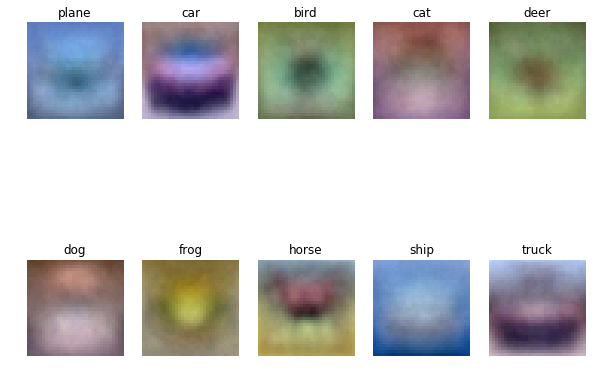

In [21]:
w = best_softmax.W[:-1,:]
w = w.reshape(32,32,3,10)

w_min,w_max = np.min(w),np.max(w)
print(w_min,w_max)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
    plt.subplot(2, 5, i + 1)
    
    wimg = 255.0*(w[:,:,:,i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])
